# Automated Chart Pattern Recognition in Financial Trading

## Introduction
With advancements in machine learning, automation has become increasingly prevalent in financial trading. By making use of automation, traders can distill the complexities of market movements into identifiable patterns to make informed decisions.

Traditionally, identifying chart patterns requires manual observation and years of experience. However, we propose an approach using machine learning to automate pattern recognition in financial data - providing traders with the tools to screen potential trading opportunities.

## Emergence of Price Action Patterns
Price action results from countless interactions between buyers and sellers in the market. These individuals react to global financial events, company news, and other factors. As numerous individual trades aggregate, sometimes robust, identifiable patterns emerge. These patterns may provide insightful guidance for predicting future price changes, making them especially useful tools in trading.

## Proposed Methodology for Pattern Identification
Our methodology aims to identify familiar and uncharted patterns exhibited by the price action chart algorithmically. We plan to use OHLCV (Open, High, Low, Close, Volume) data, and apply a sliding-window approach for data normalization. The objective is to automate the entire pattern recognition process and scale it to large amounts of live financial data to screen prospective trading opportunities in real-time.

## Technical Approach
### Data Collection
Our data acquisition phase involves scraping historical OHLCV data from popular cryptocurrency exchange Binance.


In [1]:
import pandas as pd
import requests
import json
import datetime

def fetch_ohlcv(symbol, interval, start_time, end_time):
    start_time = int(start_time.timestamp() * 1000) # Convert to milliseconds
    end_time = int(end_time.timestamp() * 1000) # Convert to milliseconds

    url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&startTime={start_time}&endTime={end_time}&limit=1000"

    raw_data = requests.get(url).text
    data = json.loads(raw_data)
    df = pd.DataFrame(data, columns=['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'trades', 'taker_buy_base', 'taker_buy_quote', 'ignored'])

    # Convert times to more readable format
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
    df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')

        # Convert prices and volume to float
    df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)

    df = df[['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time']]  # Keep only OHLCV data

    return df

In [2]:

start_time = datetime.datetime(2020, 1, 1, 00, 00, 00)  # January 1 2021 15:30:45
end_time = datetime.datetime(2023, 12, 31, 23, 59, 59)  # December 31 2021 23:59:59

# Loop to fetch data in the required range
full_data = pd.DataFrame()
while start_time < end_time:
    new_data = fetch_ohlcv('BTCUSDT', '8h', start_time, end_time)
    if not new_data.empty:
        full_data = pd.concat([full_data, new_data])
        # Set the start time for the next batch to be the close time of the last bar
        start_time = new_data.iloc[-1]['close_time'] 
    else:
        print(f"No data returned for time range {start_time} to {end_time}")
        break

In [3]:
len(full_data)

4383

In [4]:
full_data.head()

,open_time,open,high,low,close,volume,close_time
0,2020-01-01 00:00:00,7195.24,7245.00,7175.46,7209.83,4895.044231,2020-01-01 07:59:59.999
1,2020-01-01 08:00:00,7209.83,7255.00,7180.00,7234.19,6659.191820,2020-01-01 15:59:59.999
2,2020-01-01 16:00:00,7234.20,7249.99,7175.15,7200.85,5238.152114,2020-01-01 23:59:59.999
3,2020-01-02 00:00:00,7200.77,7212.50,7105.00,7110.57,7797.316187,2020-01-02 07:59:59.999
4,2020-01-02 08:00:00,7110.98,7180.00,7107.43,7130.98,8341.244843,2020-01-02 15:59:59.999


In [5]:
full_data.tail()

,open_time,open,high,low,close,volume,close_time
378,2023-12-30 08:00:00,41947.16,42430.00,41520.30,42374.96,9258.12698,2023-12-30 15:59:59.999
379,2023-12-30 16:00:00,42374.97,42612.32,42079.97,42140.28,8094.42613,2023-12-30 23:59:59.999
380,2023-12-31 00:00:00,42140.29,42693.00,41965.84,42537.10,7059.64183,2023-12-31 07:59:59.999
381,2023-12-31 08:00:00,42537.10,42899.00,42352.76,42457.17,8029.77274,2023-12-31 15:59:59.999
382,2023-12-31 16:00:00,42457.17,42719.80,42056.00,42283.58,8496.50146,2023-12-31 23:59:59.999


In [6]:
full_data

,open_time,open,high,low,close,volume,close_time
0,2020-01-01 00:00:00,7195.24,7245.00,7175.46,7209.83,4895.044231,2020-01-01 07:59:59.999
1,2020-01-01 08:00:00,7209.83,7255.00,7180.00,7234.19,6659.191820,2020-01-01 15:59:59.999
2,2020-01-01 16:00:00,7234.20,7249.99,7175.15,7200.85,5238.152114,2020-01-01 23:59:59.999
3,2020-01-02 00:00:00,7200.77,7212.50,7105.00,7110.57,7797.316187,2020-01-02 07:59:59.999
4,2020-01-02 08:00:00,7110.98,7180.00,7107.43,7130.98,8341.244843,2020-01-02 15:59:59.999
...,...,...,...,...,...,...,...
378,2023-12-30 08:00:00,41947.16,42430.00,41520.30,42374.96,9258.126980,2023-12-30 15:59:59.999
379,2023-12-30 16:00:00,42374.97,42612.32,42079.97,42140.28,8094.426130,2023-12-30 23:59:59.999
380,2023-12-31 00:00:00,42140.29,42693.00,41965.84,42537.10,7059.641830,2023-12-31 07:59:59.999
381,2023-12-31 08:00:00,42537.10,42899.00,42352.76,42457.17,8029.772740,2023-12-31 15:59:59.999


### Data Transformation
After collecting the raw data, we define a window size w and a number of samples n. Each sample is then normalized based on its maximum and minimum values. This normalization is applied to all the OHLC prices. Volume is also normalized based on its maximum and minimum within the series.

In [7]:
import numpy as np

def generate_samples(df, window_size, prediction_horizon, n_samples):
    samples = {}
    count = 0
    window=window_size+prediction_horizon
    while count < n_samples:

        start_idx = np.random.randint(len(df) - window + 1)     # Randomly select the start index
        df_window = df.iloc[start_idx : start_idx + window].copy()  # Extract the window data

        # Normalize the prices
        max_price = df_window[['open', 'high', 'low', 'close']].max().max()
        min_price = df_window[['open', 'high', 'low', 'close']].min().min()

        for column in ['open', 'high', 'low', 'close']:
            df_window[column + '_norm'] = (df_window[column] - min_price) / (max_price - min_price)
        
        # Normalize Volume
        df_window['volume_norm'] = (df_window['volume'] - df_window['volume'].min()) / (df_window['volume'].max() - df_window['volume'].min())
        
        
        df_window.set_index('open_time', inplace=True)
        samples[count] = df_window
        count += 1

    return samples



In [13]:
window_size=15 #number of bars per chart
prediction_horizon=5
# Usage:
samples = generate_samples(full_data, window_size, prediction_horizon,1000)  # Adjust the values accordingly

In [14]:
samples[9]

,open,high,low,close,volume,close_time,open_norm,high_norm,low_norm,close_norm,volume_norm
open_time,,,,,,,,,,,
2020-09-27 08:00:00,10671.28,10766.41,10594.82,10754.82,11263.214390,2020-09-27 15:59:59.999,0.516111,0.681267,0.383368,0.661146,0.203302
2020-09-27 16:00:00,10754.82,10784.61,10700.73,10774.25,8593.821012,2020-09-27 23:59:59.999,0.661146,0.712865,0.567240,0.694878,0.081588
2020-09-28 00:00:00,10774.26,10950.00,10774.26,10854.00,17686.061823,2020-09-28 07:59:59.999,0.694896,1.000000,0.694896,0.833333,0.496159
2020-09-28 08:00:00,10854.00,10941.99,10830.00,10901.90,18416.071725,2020-09-28 15:59:59.999,0.833333,0.986094,0.791667,0.916493,0.529445
2020-09-28 16:00:00,10901.89,10918.57,10626.00,10696.12,13993.118186,2020-09-28 23:59:59.999,0.916476,0.945434,0.437500,0.559236,0.327775
2020-09-29 00:00:00,10696.11,10747.88,10656.82,10726.99,11847.533395,2020-09-29 07:59:59.999,0.559219,0.649097,0.491007,0.612830,0.229945
2020-09-29 08:00:00,10727.00,10797.00,10707.00,10725.94,14918.605340,2020-09-29 15:59:59.999,0.612847,0.734375,0.578125,0.611007,0.369974
2020-09-29 16:00:00,10725.94,10867.54,10635.87,10840.48,15108.759664,2020-09-29 23:59:59.999,0.611007,0.856840,0.454635,0.809861,0.378644
2020-09-30 00:00:00,10840.58,10849.34,10675.29,10706.68,12786.597804,2020-09-30 07:59:59.999,0.810035,0.825243,0.523073,0.577569,0.272762


### Generating Chart Images
For each normalized series, we generate three images:

The original OHLCV chart
The normalized chart
A 5x50 pixel image - each column corresponds to the normalized data of a single 'bar' of the dataset.

In [10]:
import mplfinance as mpf
import matplotlib.pyplot as plt

def plot_charts(df_sample, sample_index, window_size):
    #df_sample.set_index('open_time', inplace=True)
    

    ohlc = df_sample[['open', 'high', 'low', 'close', 'volume']]
    ohlc.columns = ['Open', 'High', 'Low', 'Close', 'Volume']  # mplfinance requires column names to start with a capital letter
    ohlc.index.name = 'Date'
    _index=ohlc.index[window_size]

    ohlc_norm = df_sample[['open_norm', 'high_norm', 'low_norm', 'close_norm', 'volume_norm']]
    ohlc_norm.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    ohlc_norm.index.name = 'Date'

    norm_values = df_sample[['open_norm', 'high_norm', 'low_norm', 'close_norm', 'volume_norm']]

    # OHLC chart for original data
    mpf.plot(ohlc, type='candle', style='charles', title=f"Sample {sample_index} - Original Data", volume=True, vlines=[_index])


    # OHLC chart for normalized data
    mpf.plot(ohlc_norm, type='candle', style='charles', title=f"Sample {sample_index} - Normalized Data", volume=True, vlines=[_index])
    
    # 5x50 pixel based image for normalized data
    plt.imshow(norm_values.transpose(), cmap='gray', aspect='auto')
    plt.title(f"Sample {sample_index} - 5x{window_size} Image")

    # Add vertical dashed red line at the window_size point
    plt.axvline(x=window_size, color='red', linestyle='--')
    plt.show()



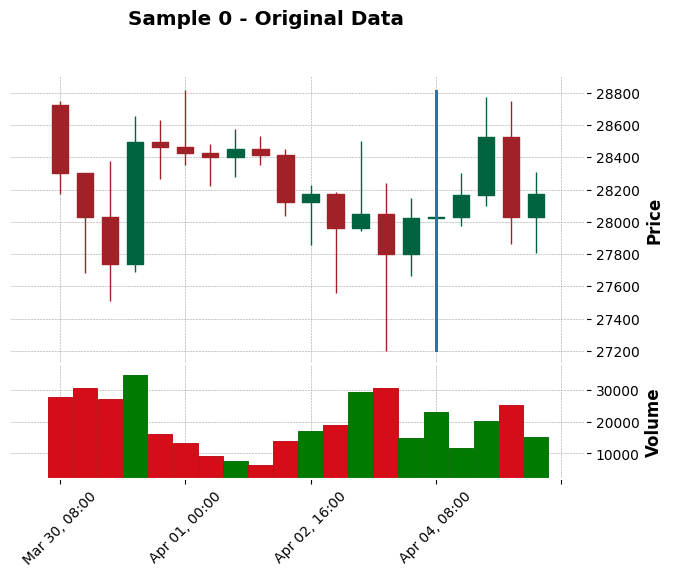

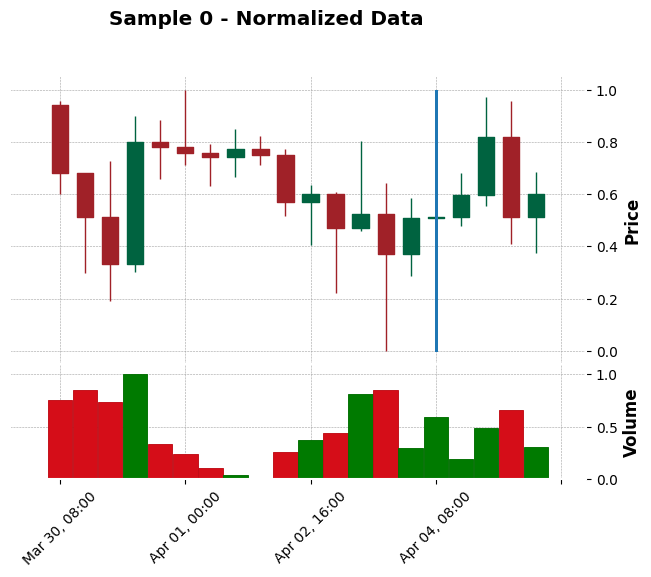

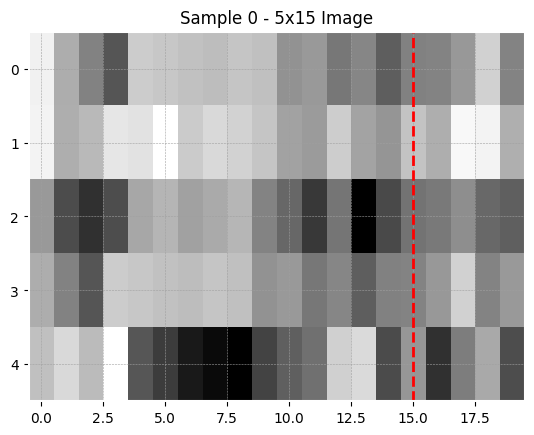

In [16]:
# Run this method for each sample
for i, df_sample in samples.items():
    if i==0: 
        plot_charts(df_sample, i, window_size)

In [11]:
def prepare_images(samples, window):
    images = []
    ids = []
    for i, df_sample in samples.items():
        # Extract the normalized values as a 5x50 numpy array
        norm_values = df_sample[['open_norm', 'high_norm', 'low_norm', 'close_norm', 'volume_norm']].iloc[:window].to_numpy().transpose()
        # Reshape to 50x5x1 to match the input shape that the CNN model expects
        norm_values = norm_values.reshape(window, 5, 1)
        images.append(norm_values)
        ids.append(i)  # Use the sample index as a unique ID
    return np.array(images), np.array(ids)

# Prepare the images and image IDs
train_images, image_ids = prepare_images(samples, window_size)

In [12]:
from sklearn.cluster import KMeans

# Flatten the images into 1D array since KMeans does not accept 3D input
train_images_flattened = train_images.reshape(train_images.shape[0], -1)

# n_clusters is (arbitrarily) set to 10, but should be chosen based on your expected number of classes
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model
kmeans.fit(train_images_flattened)

c:\Projects\22-CryptoGPT\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [13]:
def get_images_in_cluster(cluster_label, kmeans_labels, image_ids):
    return [id for (id, label) in zip(image_ids, kmeans_labels) if label == cluster_label]

# Get images in cluster 0
cluster0_ids = get_images_in_cluster(5, kmeans.labels_, image_ids)
print(f"IDs of images in cluster 0:\n{cluster0_ids}")

# Then, use the IDs to pull the corresponding images from your 'samples' dict for plotting
#for id in cluster0_ids:
    #plot_charts(samples[id], id)

IDs of images in cluster 0:
[]


In [14]:
import plotly.express as px

# Generate a list of all labels
all_labels = kmeans.labels_

# Create a DataFrame with labels
df = pd.DataFrame({'Cluster': all_labels})

# Create a histogram with hover information
fig = px.histogram(df, x='Cluster', nbins=len(set(all_labels)),
                   title='Number of images in each cluster',
                   labels={'Cluster': 'Cluster', 'count': 'Frequency'},
                   opacity=0.7, color_discrete_sequence=['#0504aa'])

# Add hover information
fig.update_traces(hovertemplate='Cluster: %{x}<br>Frequency: %{y}')

fig.update_layout(
    xaxis=dict(title='Cluster'),
    yaxis=dict(title='Frequency'),
    bargap=0.1,
    bargroupgap=0.2
)

# Show the plot
fig.show()

IDs of images in cluster 0:
[0, 1, 6, 9, 11, 17, 20, 22, 28, 30, 54, 55, 56, 57, 63, 72, 73, 76, 87, 90, 97, 98, 102, 115, 121, 123, 126, 134, 137, 146, 147, 159, 165, 175, 177, 189, 195, 196, 197, 200, 205, 210, 214, 215, 229, 231, 233, 240, 244, 253, 255, 256, 273, 279, 284, 285, 287, 291, 299, 301, 302, 305, 307, 310, 312, 320, 325, 327, 329, 337, 341, 347, 351, 352, 354, 357, 361, 363, 385, 391, 394, 396, 397, 408, 422, 423, 427, 429, 431, 446, 455, 458, 461, 466, 468, 471, 473, 480, 485, 487, 489, 498, 505, 521, 523, 528, 535, 536, 540, 550, 558, 560, 563, 572, 580, 589, 592, 593, 596, 610, 627, 649, 673, 674, 676, 693, 695, 704, 710, 726, 727, 730, 732, 737, 747, 749, 757, 767, 774, 775, 778, 786, 789, 792, 794, 796, 806, 809, 811, 812, 813, 815, 827, 828, 834, 835, 840, 855, 856, 861, 866, 868, 873, 877, 881, 882, 886, 887, 902, 914, 915, 916, 918, 919, 923, 924, 926, 933, 945, 949, 951, 953, 968, 970, 972, 988, 989, 990, 993, 999, 1003, 1011, 1026, 1028, 1030, 1036, 1040, 1042,

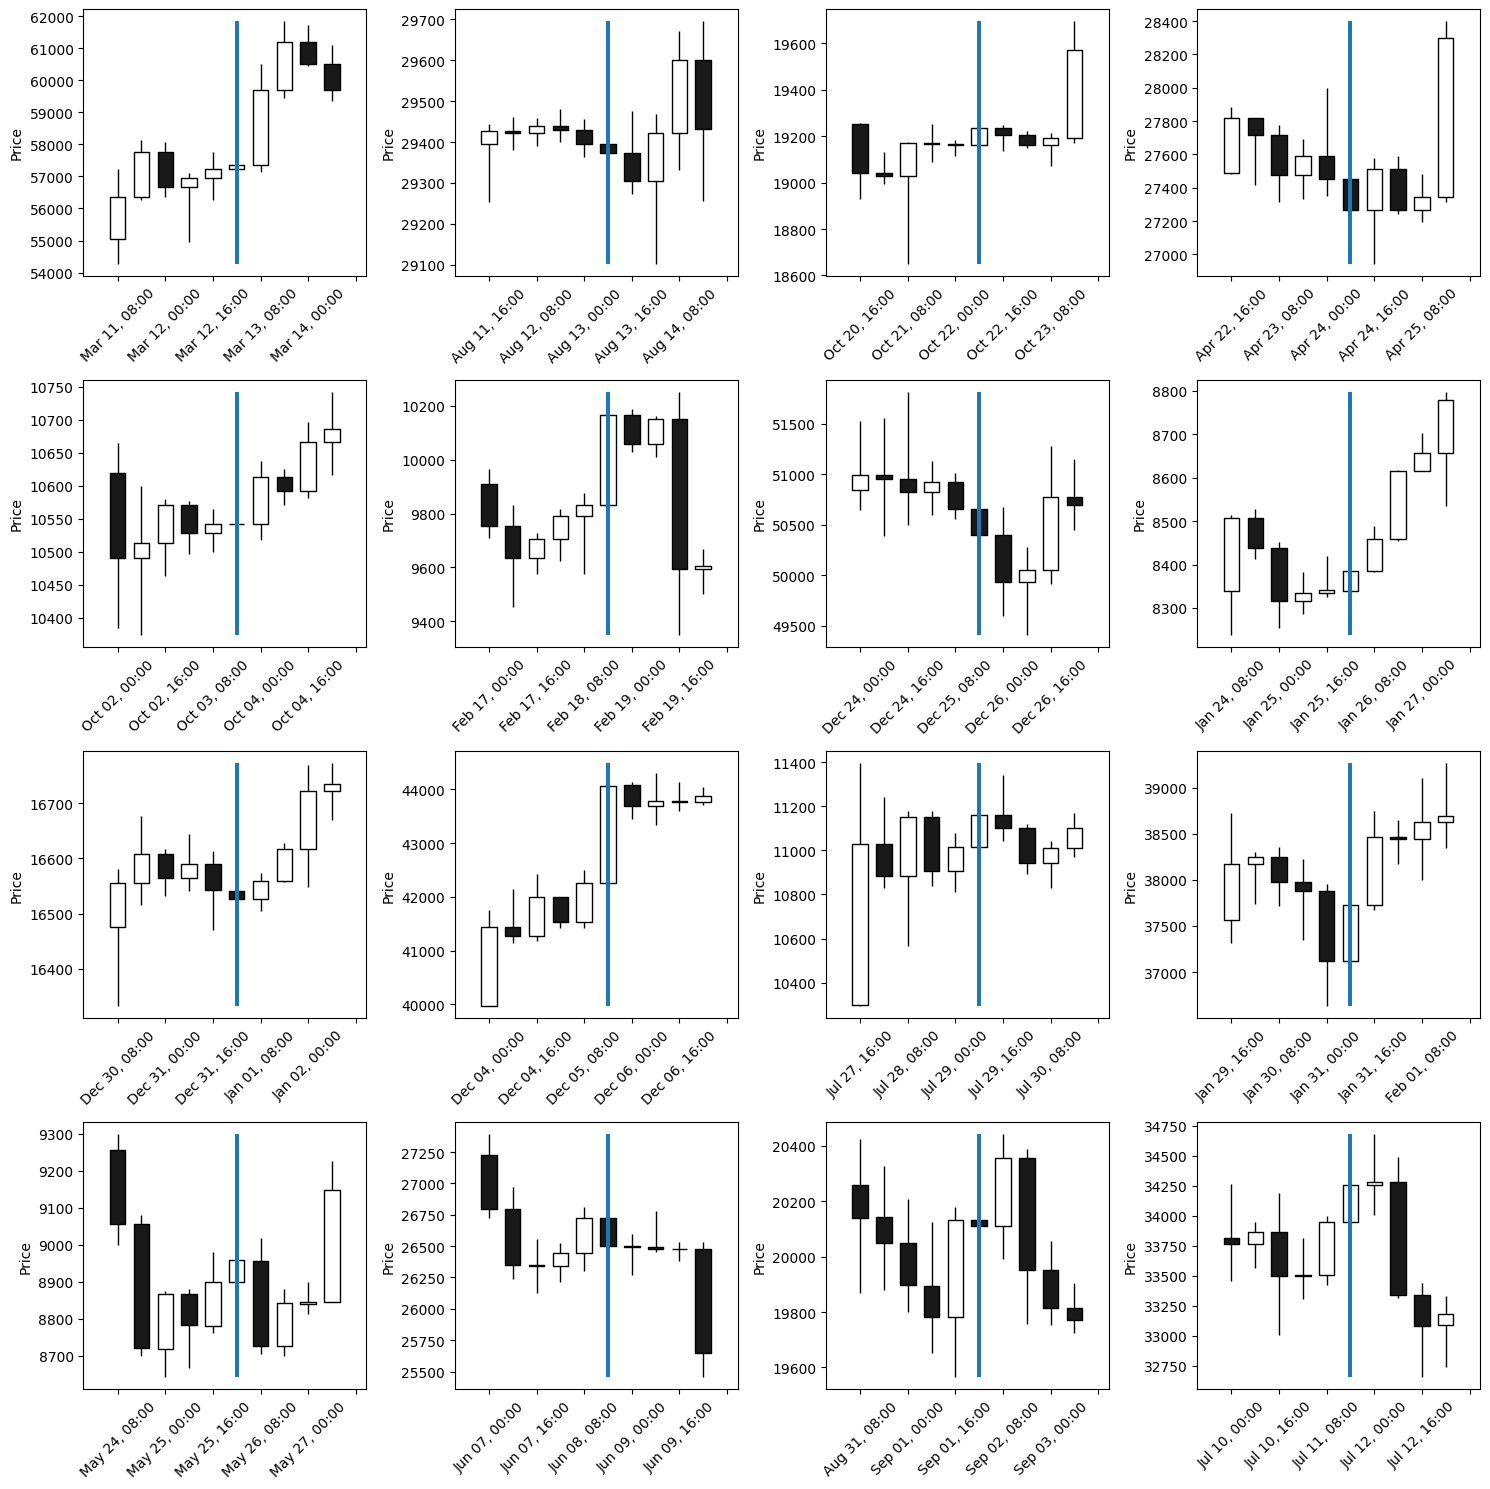

In [27]:
import math
import matplotlib.pyplot as plt
import mplfinance as mpf

def plot_to_subplot(df, ax, windows_size):
    _index=df.index[window_size]
    # Your function here
    mpf.plot(df, type='candle', ax=ax, axtitle='', volume=False, yscale='linear', vlines=[_index])

# Get images in cluster 0
cluster0_ids = get_images_in_cluster(2, kmeans.labels_, image_ids)

# Print all cluster IDs
print(f"IDs of images in cluster 0:\n{cluster0_ids}")

# Limit to 16 images
cluster0_ids = cluster0_ids[200:216]

# Determine the subplot grid size
num_images = len(cluster0_ids)
num_cols = 4  # Four images per row
num_rows = 4  # Limit to 4 rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Reshape axs to 1-D array for easy iterating
axs = axs.flatten()

for i, id in enumerate(cluster0_ids):
    plot_to_subplot(samples[id], axs[i], window_size)

# If there are less images than subplots, hide the extras
for i in range(num_images, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [38]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, homogeneity_score, completeness_score, v_measure_score
import numpy as np

def clustering_evaluation_report(kmeans_model, data, true_labels=None):
    """
    Evaluate a KMeans clustering model and provide a report with interpretation.

    Parameters:
    - kmeans_model: The trained KMeans model.
    - data: The input data used for clustering.
    - true_labels: (Optional) Ground truth labels for evaluation.

    Returns:
    - report: A dictionary containing evaluation metrics, explanations, and comparisons to reference values.
    """

    # Predicted cluster labels
    predicted_labels = kmeans_model.labels_

    # Evaluation Metrics
    inertia = kmeans_model.inertia_
    silhouette_avg = silhouette_score(data, predicted_labels)
    ch_score = calinski_harabasz_score(data, predicted_labels)
    db_index = davies_bouldin_score(data, predicted_labels)

    # Explanation
    explanation = "These metrics provide an evaluation of the KMeans clustering results.\n"
    explanation += f"- Inertia (within-cluster sum of squares): {inertia:.2f}\n"
    explanation += f"- Silhouette Score: {silhouette_avg:.2f}\n"
    explanation += f"- Calinski-Harabasz Index: {ch_score:.2f}\n"
    explanation += f"- Davies-Bouldin Index: {db_index:.2f}\n"

    # Add ground truth evaluation if available
    if true_labels is not None:
        homogeneity = homogeneity_score(true_labels, predicted_labels)
        completeness = completeness_score(true_labels, predicted_labels)
        v_measure = v_measure_score(true_labels, predicted_labels)

        # Explanation for ground truth evaluation
        explanation += "\nGround Truth Evaluation:\n"
        explanation += f"- Homogeneity: {homogeneity:.2f}\n"
        explanation += f"- Completeness: {completeness:.2f}\n"
        explanation += f"- V-Measure: {v_measure:.2f}\n"

        # Reference values for interpretation
        reference_values = {
            'Silhouette Score': (0.25, 0.5),
            'Calinski-Harabasz Index': (100, 200),
            'Davies-Bouldin Index': (0, 1),
            'Homogeneity': (0, 1),
            'Completeness': (0, 1),
            'V-Measure': (0, 1)
        }

        # Interpretation
        interpretation = "\nInterpretation:\n"
        for metric, (low, high) in reference_values.items():
            interpretation += f"- {metric}:\n"
            interpretation += f"  - Reference Range: [{low}, {high}]\n"
            interpretation += f"  - Model Value: {globals()[metric.lower()]:.2f}\n"
            interpretation += f"  - Interpretation: "
            if low <= globals()[metric.lower()] <= high:
                interpretation += "Good"
            elif globals()[metric.lower()] < low:
                interpretation += "Too Low (Consider increasing the number of clusters)"
            else:
                interpretation += "Too High (Consider decreasing the number of clusters)"
            interpretation += "\n"

        # Update explanation with interpretation
        explanation += interpretation

    # Create the report dictionary
    report = {
        'inertia': inertia,
        'silhouette_score': silhouette_avg,
        'calinski_harabasz_score': ch_score,
        'davies_bouldin_score': db_index,
        'explanation': explanation
    }

    return report

# Example Usage:
# report = clustering_evaluation_report(kmeans_model, train_images_flattened, true_labels)
# print(report['explanation'])


# Example Usage:
# Evaluation report
report = clustering_evaluation_report(kmeans, train_images_flattened)
print(report['explanation'])



These metrics provide an evaluation of the KMeans clustering results.
- Inertia (within-cluster sum of squares): 9149.00
- Silhouette Score: 0.19
- Calinski-Harabasz Index: 2350.34
- Davies-Bouldin Index: 1.80



In [16]:
def calculate_confidence(new_data_images, new_data_labels, kmeans):
    confidence_scores = []
    for i, label in enumerate(new_data_labels):
        # Extract the normalized values for the current data point
        norm_values = new_data_images[i, :, :].flatten()

        # Extract the centroid of the assigned cluster
        centroid = kmeans.cluster_centers_[label]

        # Calculate the Euclidean distance between the data point and the centroid
        distance = np.linalg.norm(norm_values - centroid)

        # You can choose a confidence score based on the distance or other criteria
        confidence_score = 1 / (1 + distance)  # For example, inversely proportional to the distance

        confidence_scores.append(confidence_score)

    return confidence_scores

In [20]:
import datetime
import numpy as np
import pandas as pd
import requests
import json
import mplfinance as mpf
import matplotlib.pyplot as plt

def fetch_recent_data(symbol, interval, window_size):
    # Fetch the recent data for the specified symbol and interval
    current_time = datetime.datetime.utcnow()
    start_time = current_time - datetime.timedelta(hours=window_size * 8)  # Assuming each bar represents 8 hours
    
    df_recent = fetch_ohlcv(symbol, interval, start_time, current_time)
    
    return df_recent

def prepare_single_image(df, window_size):
    # Normalize the prices
    max_price = df[['open', 'high', 'low', 'close']].max().max()
    min_price = df[['open', 'high', 'low', 'close']].min().min()

    for column in ['open', 'high', 'low', 'close']:
        df[column + '_norm'] = (df[column] - min_price) / (max_price - min_price)
    
    # Normalize Volume
    df['volume_norm'] = (df['volume'] - df['volume'].min()) / (df['volume'].max() - df['volume'].min())

    # Extract the normalized values as a 5x50 numpy array
    norm_values = df[['open_norm', 'high_norm', 'low_norm', 'close_norm', 'volume_norm']].to_numpy().transpose()

    # Reshape to 50x5x1 to match the input shape that the CNN model expects
    norm_values = norm_values.reshape(window_size, 5, 1)

    return norm_values

def plot_single_chart(df):
    ohlc = df[['open', 'high', 'low', 'close', 'volume']]
    ohlc.columns = ['Open', 'High', 'Low', 'Close', 'Volume']  # mplfinance requires column names to start with a capital letter
    ohlc.index.name = 'Date'

    mpf.plot(ohlc, type='candle', style='charles', title='Recent Data', volume=True)




In [23]:
import datetime
import numpy as np
import pandas as pd
import requests
import json
import mplfinance as mpf
import matplotlib.pyplot as plt

def fetch_and_plot_recent_data(symbol, interval, window_size, model, min_confidence_threshold):
    # Fetch more bars than window_size
    total_bars = window_size * 2  # Fetch double the bars to have enough data for plotting
    current_time = datetime.datetime.utcnow()
    start_time = current_time - datetime.timedelta(hours=total_bars * 8)  # Assuming each bar represents 8 hours
    
    df_recent = fetch_ohlcv(symbol, interval, start_time, current_time)

    # Plot the entire recent data
    plot_single_chart(df_recent)

    # Prepare the images for classification
    images = []
    labels = []
    for i in range(total_bars - window_size + 1):
        df_window = df_recent.iloc[i:i + window_size].copy()

        norm_values = prepare_single_image(df_window, window_size)
        images.append(norm_values)

        # Predict cluster labels for the window
        window_labels = model.predict(norm_values.reshape(window_size, -1).flatten().reshape(1, -1))
        labels.append(window_labels[0])

    # Prepare a table with identified classes and confidence scores
    confidence_scores = calculate_confidence(np.array(images), np.array(labels), model)

    identified_classes = []
    for i, label in enumerate(labels):
        confidence_score = confidence_scores[i]
        if confidence_score > min_confidence_threshold:
            identified_classes.append((label, confidence_score))
    
    if identified_classes:
        identified_df = pd.DataFrame(identified_classes, columns=['Class', 'Confidence'])
        print("Identified Classes:")
        print(identified_df)
    else:
        print("No classes identified above the confidence threshold.")

In [25]:
# Example usage:
crypto_pair = 'BTCUSDT'
timeframe = '8h'
window_size = 5

# Call the method with your classification model and confidence threshold
fetch_and_plot_recent_data(crypto_pair, timeframe, window_size, kmeans, min_confidence_threshold=0.1)

Identified Classes:
   Class  Confidence
0      2    0.404728
1      3    0.448191
2      3    0.464807
3      3    0.484027
4      3    0.475188
5      3    0.430382
